Base Requirements (80% - B grade)
1. Data Collection and Preparation (25%)
* Use at least two distinct data sources
* Perform basic data cleaning (handling missing values, removing duplicates)
* Demonstrate understanding of data types and encoding
2. Exploratory Data Analysis and Visualization (25%)
* Create at least 3 different types of visualizations
* Provide basic statistical summaries of key variables
* Demonstrate appropriate use of data encoding in visualizations
3. Data Processing (15%)
* Implement at least one technique for handling missing data
* Demonstrate basic imputation techniques
4. Streamlit App Development (25%)
* Create a functional Streamlit app with at least 2 interactive elements
* Include basic documentation within the app
* Deploy the app and make it accessible online
5. GitHub Repository (10%)
* Maintain a well-organized GitHub repository with clear documentation
* Include a README file with project overview and setup instructions





Above and Beyond (Additional 20% - A grade)
Students can earn additional points by implementing any of the following:

6. Advanced Data Techniques (Up to 5%)
* Implement advanced data cleaning techniques
* Use more complex data integration methods
7. Sophisticated Analysis and Visualization (Up to 5%)
* Create advanced, interactive visualizations
* Perform in-depth analysis of data distributions and relationships
8. Advanced Data Processing (Up to 5%)
* Implement multiple imputation techniques and compare their effectiveness
* Demonstrate handling of complex missing data patterns
9. Enhanced App Features (Up to 5%)
* Implement more advanced Streamlit features
* Create a polished, user-friendly interface
10. Project Complexity and Originality (Up to 5%)
* Tackle a particularly challenging or unique problem
* Demonstrate exceptional creativity in approach or implementatio

Kaggle Datasets:
* https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset
* https://www.kaggle.com/datasets/hanaksoy/health-and-sleep-statistics

# 1. Data Collection & Preparation & 10. Project Complexity and Originality

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from imblearn.over_sampling import SMOTE
import hiplot as hip

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # this could be any ML method
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler

In [2]:
hss = pd.read_csv('Health_Sleep_Statistics.csv')
# cmu = pd.read_csv('cmu-sleep.csv')
shl = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

Importing 2 dataframes which include health and sleep data:
* Health_Sleep_Statistics - Focuses on the sleep data
* Sleep_health_and_lifestyle_dataset - Focuses on the physical activity data

Both datasets provide information on age, gender, sleep quality, sleep duration, sleep disorders, and overall health.

# 2. EDA & Visualization & 7. Sophisticated Analysis and Visualization

### Exploring the Sleep Focused data

User ID  Age Gender  Sleep Quality Bedtime Wake-up Time  Daily Steps  \
0        1   25      f              8   23:00        06:30         8000   
1        2   34      m              7   00:30        07:00         5000   
2        3   29      f              9   22:45        06:45         9000   
3        4   41      m              5   01:00        06:30         4000   
4        5   22      f              8   23:30        07:00        10000   

   Calories Burned Physical Activity Level Dietary Habits Sleep Disorders  \
0             2500                  medium        healthy              no   
1             2200                     low      unhealthy             yes   
2             2700                    high        healthy              no   
3             2100                     low      unhealthy             yes   
4             2800                    high         medium              no   

  Medication Usage  
0               no  
1              yes  
2               no  
3               no  
4               no

User ID         Age  Sleep Quality   Daily Steps  Calories Burned
count  100.000000  100.000000     100.000000    100.000000        100.00000
mean    50.500000   36.010000       7.000000   6830.000000       2421.00000
std     29.011492    8.454865       1.734964   2498.706736        281.06759
min      1.000000   22.000000       4.000000   3000.000000       2000.00000
25%     25.750000   28.750000       5.750000   4750.000000       2175.00000
50%     50.500000   35.000000       7.500000   6750.000000       2400.00000
75%     75.250000   44.000000       8.250000   9000.000000       2700.00000
max    100.000000   50.000000       9.000000  11000.000000       2900.00000

<Axes: >

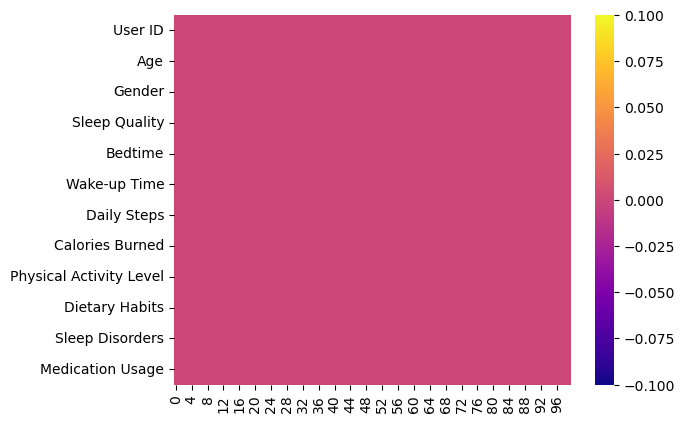

In [3]:
display(hss.head()) #Display the top 5 rows of the data
display(hss.describe()) #Show statistics and basic info about all columns
sns.heatmap(hss.isna().transpose(), cmap="plasma") #Plot a heatmap of the missing values

The above show that there is no missing data. Several variables are categorical and will need to be encoded before being fed into any models in future steps.

In [4]:
print(type(hss.loc[0,'Bedtime']), type(hss.loc[0,'Wake-up Time'])) #Checking the python variable type of the times

<class 'str'> <class 'str'>


Both bedtime and wake-up times are in string format and will need to be transformed into datetimes for analysis.

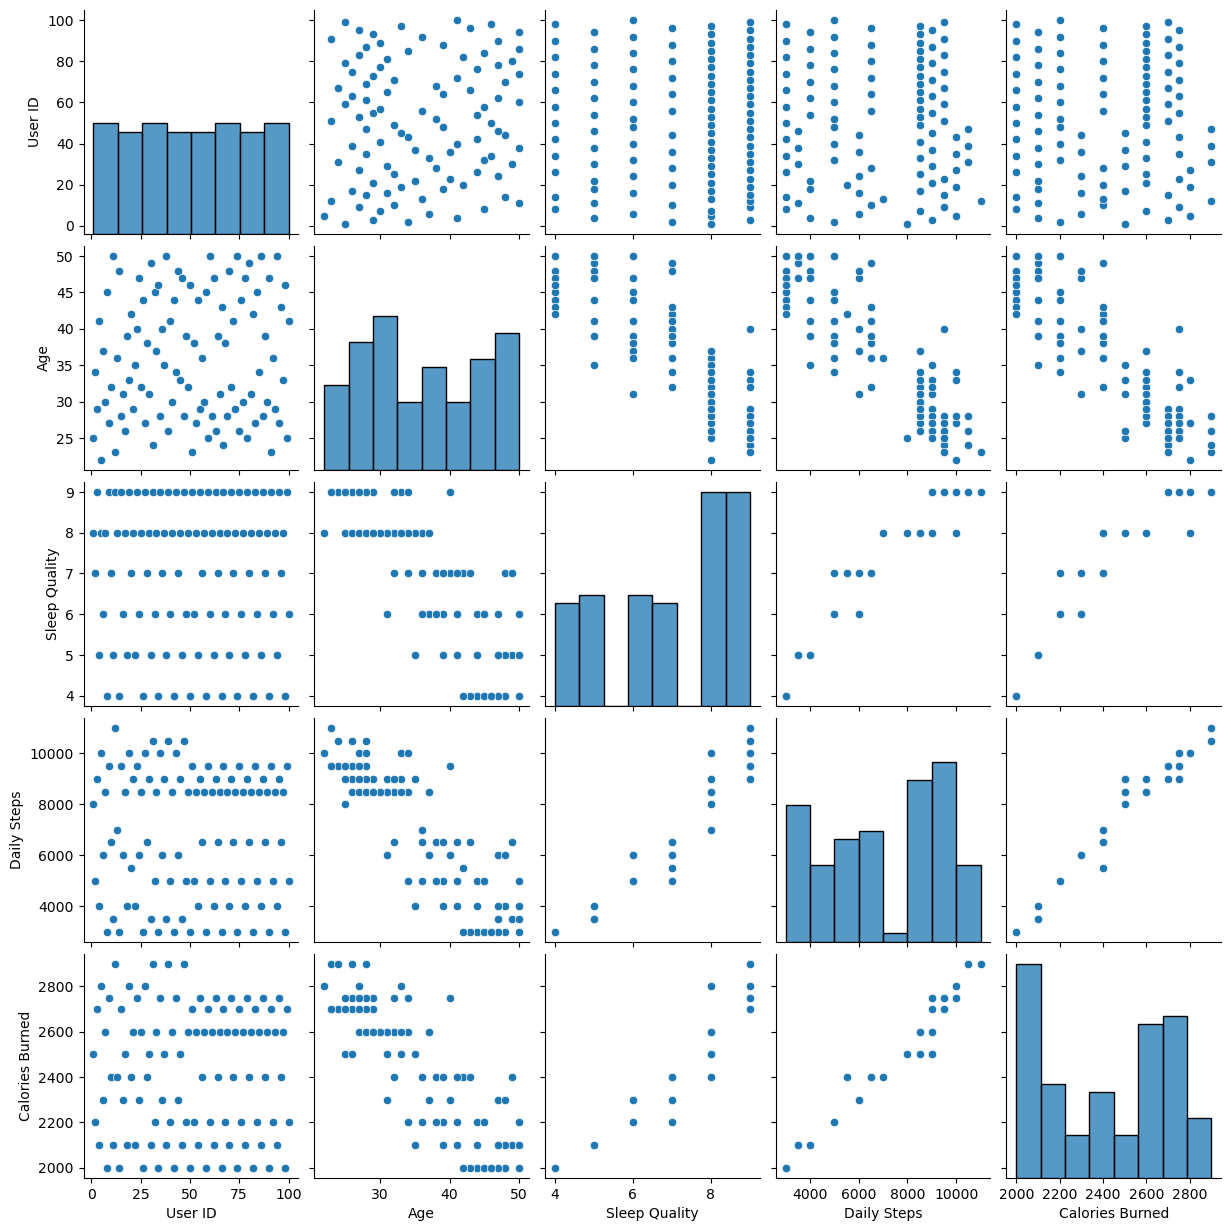

In [5]:
sns.pairplot(hss) #Plot a pairplot across all numerical variables

From the pairplots we can see that sleep quality is positively correlated with daily steps and calories burned but negatively correlated with age. This matches our intuition from general experience and scientific knowledge.

(array([1., 3., 2., 4., 4., 5., 6., 5., 5., 4., 4., 3., 3., 2., 3., 2., 3.,
        4., 2., 4., 2., 2., 4., 4., 3., 5., 3., 8.]),
 array([22., 23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34.,
        35., 36., 37., 38., 39., 40., 41., 42., 43., 44., 45., 46., 47.,
        48., 49., 50.]),
 <BarContainer object of 28 artists>)

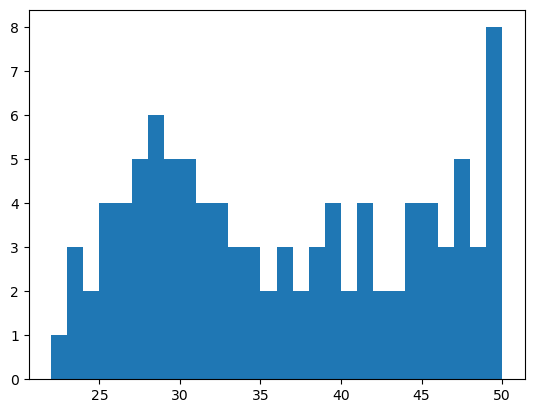

In [6]:
plt.hist(hss['Age'], bins=np.unique(hss['Age'])) #Plot a histogram of the ages

The ages don't seem to be uniformly distributed and seem to be skewed towards the ages of 25-35, which we will have to keep in consideration in analysis later.

(array([50.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 50.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

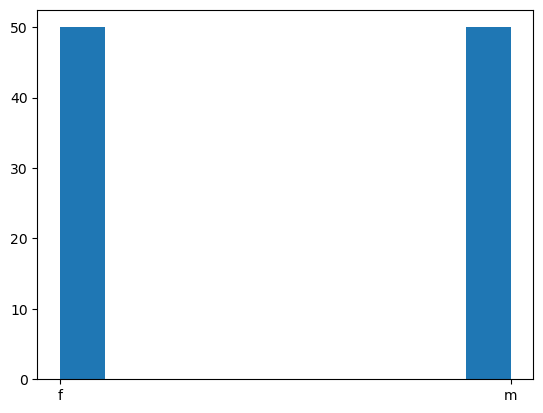

In [7]:
plt.hist(hss['Gender']) #Plot a histogram of the genders

The gender seems to be uniformly distributed.

<Axes: >

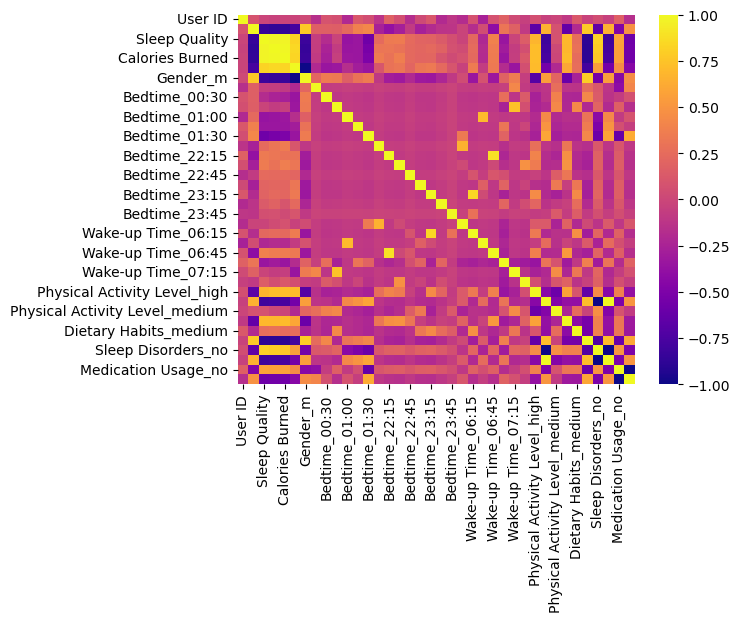

In [8]:
hss_encoded = pd.get_dummies(hss) # Turn all categorical variables into one-hot encoded dummy variables
sns.heatmap(hss_encoded.corr(), cmap="plasma") #Plot a heatmap for the correlations between all variables (including dummy variables)

The correlation heatmap seems to show that most (dummy) variables are uncorrelated. Some such as physical activity and sleep/calories burned show some correlation.

In [9]:
hip.Experiment.from_dataframe(hss).display() #Plot an interactive hiplot to see connnections between variables

<IPython.core.display.Javascript object>

The above plot helps illustrate how the variables connect. It shows valuable trends between health factors as well as the wake-up/bedtimes

### Exploring the Physical Activity Focused data

Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1         125/80          75        10000            NaN  
2         125/80          75        10000            NaN  
3         140/90          85         3000    Sleep Apnea  
4         140/90          85         3000    Sleep Apnea

Person ID         Age  Sleep Duration  Quality of Sleep  \
count  374.000000  374.000000      374.000000        374.000000   
mean   187.500000   42.184492        7.132086          7.312834   
std    108.108742    8.673133        0.795657          1.196956   
min      1.000000   27.000000        5.800000          4.000000   
25%     94.250000   35.250000        6.400000          6.000000   
50%    187.500000   43.000000        7.200000          7.000000   
75%    280.750000   50.000000        7.800000          8.000000   
max    374.000000   59.000000        8.500000          9.000000   

       Physical Activity Level  Stress Level  Heart Rate   Daily Steps  
count               374.000000    374.000000  374.000000    374.000000  
mean                 59.171123      5.385027   70.165775   6816.844920  
std                  20.830804      1.774526    4.135676   1617.915679  
min                  30.000000      3.000000   65.000000   3000.000000  
25%                  45.000000      4.000000   68.000000   5600.000000  
50%                  60.000000      5.000000   70.000000   7000.000000  
75%                  75.000000      7.000000   72.000000   8000.000000  
max                  90.000000      8.000000   86.000000  10000.000000

<Axes: >

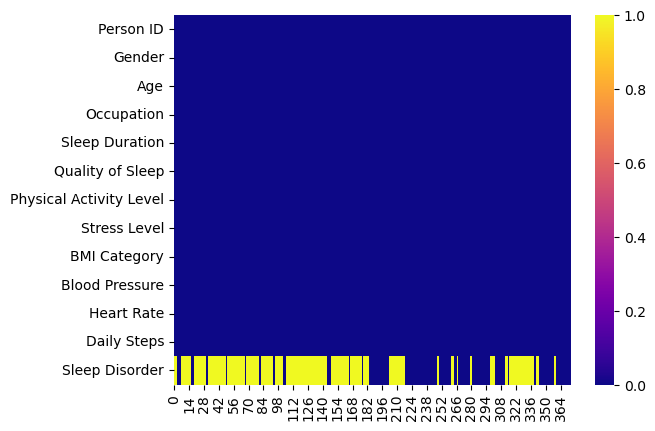

In [10]:
display(shl.head())#Display the top 5 rows of the data
display(shl.describe()) #Show statistics and basic info about all columns
sns.heatmap(shl.isna().transpose(), cmap="plasma") #Plot a heatmap of the missing values

The above shows that there is some missing data, but only in the sleep disorder column. The values in that column are null, sleep apnea, or insomnia, so it is very likely that the "missing" values simply mean "no sleep disorder". 

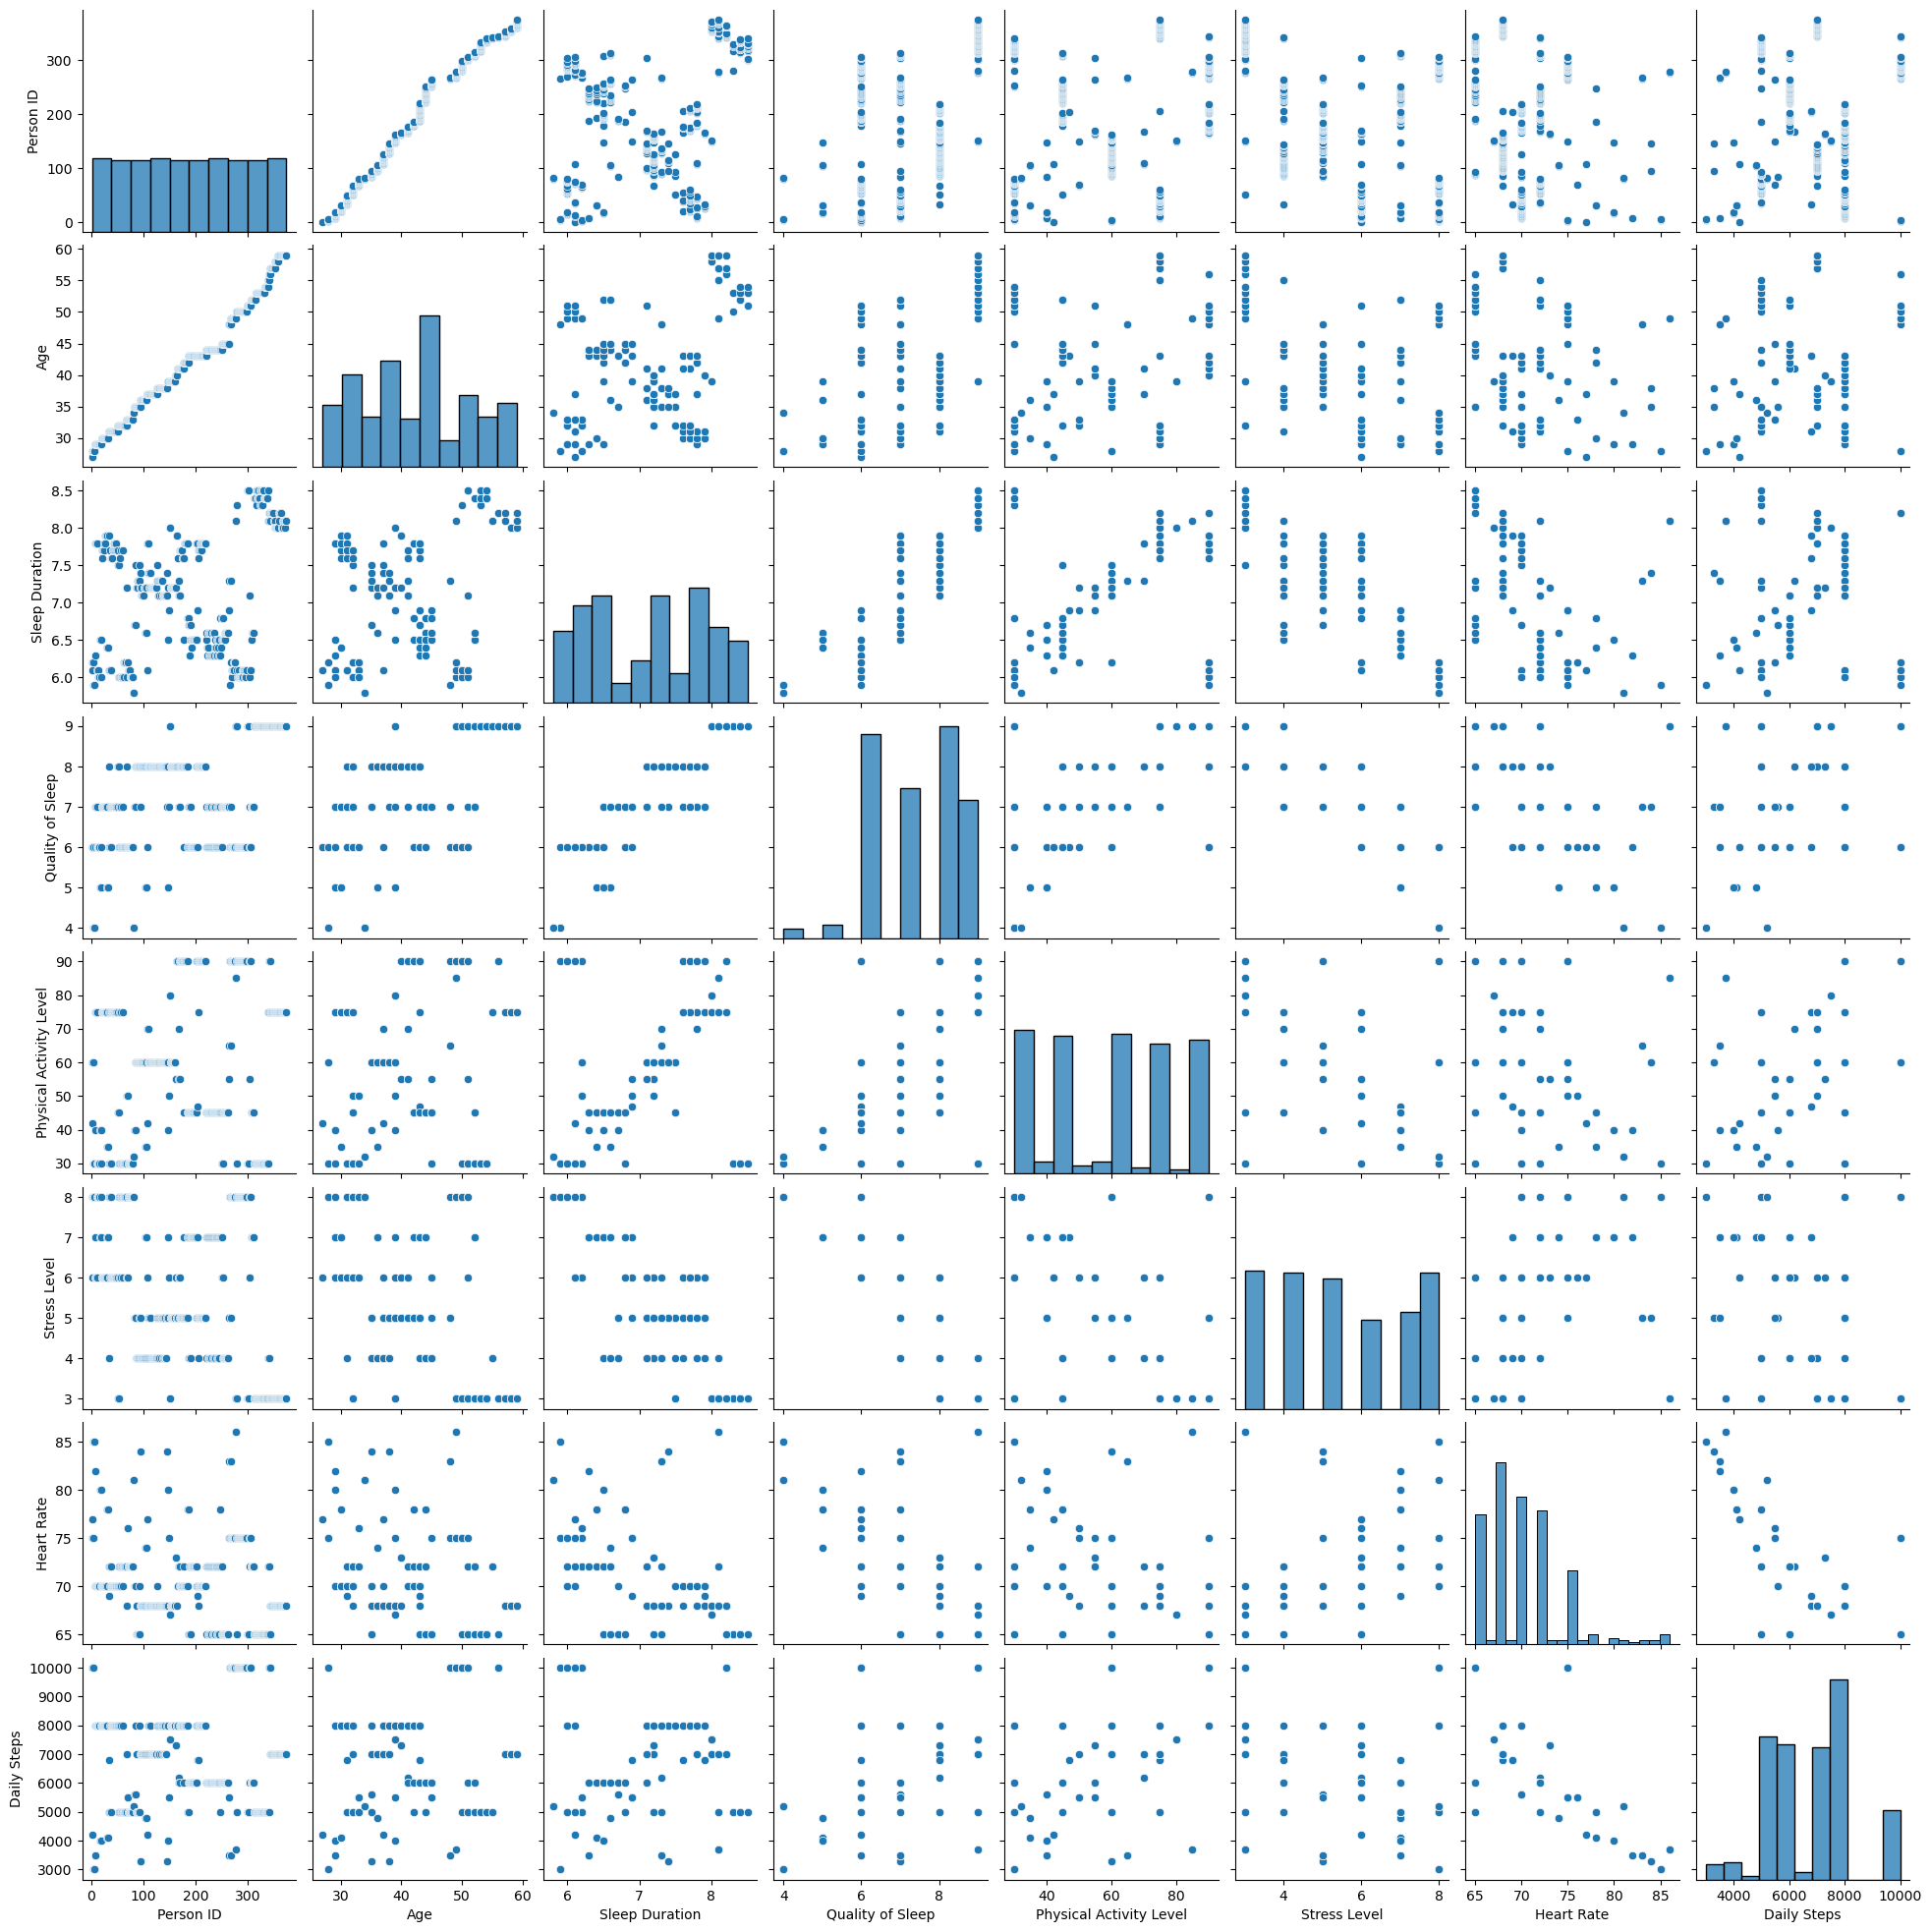

In [11]:
sns.pairplot(shl) #Plot pairplots across all numerical values

The pairplots above show a negative correlation between daily steps and heart rate, stress level and sleep duration, stress level and quality of sleep, and stress level and physical activity level. It also shows a positive correlation between physical activity level and sleep duration, and physical activity level and quality of sleep. It also shows some skewedness in the sleep quality values.

(array([ 1.,  5., 13., 13., 18., 17., 13.,  2., 12., 12., 20., 20., 15.,
         4., 12.,  9., 34., 30., 14.,  3., 11., 20.,  8.,  9., 17.,  7.,
         2.,  2.,  9., 22.]),
 array([27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
        40., 41., 42., 43., 44., 45., 48., 49., 50., 51., 52., 53., 54.,
        55., 56., 57., 58., 59.]),
 <BarContainer object of 30 artists>)

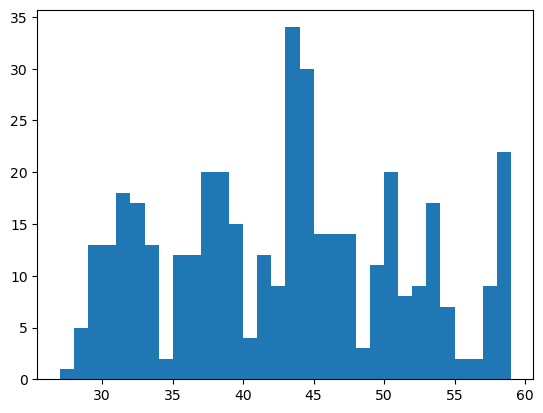

In [12]:
plt.hist(shl['Age'], bins=np.unique(shl['Age'])) #Plot a histogram of the ages

This dataset also doesn't have a unifomly distributed age, but it has less specific clumping than the other.

(array([189.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 185.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

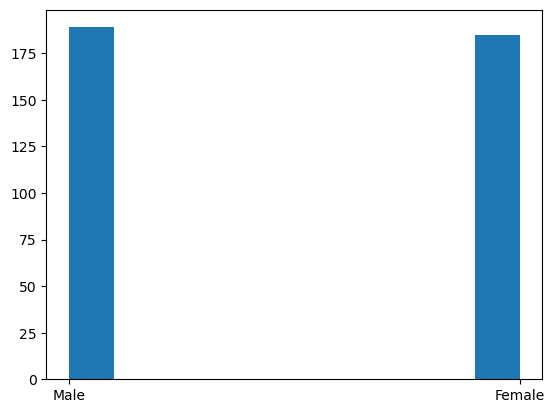

In [13]:
plt.hist(shl['Gender']) #Plot a histogram of the genders

The above histogram shows that the gender is uniformly distributed

<Axes: >

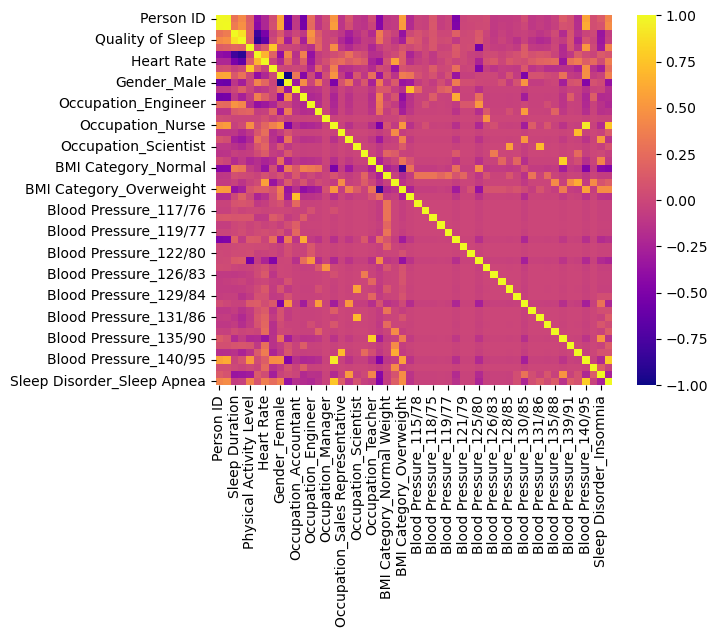

In [14]:
shl_encoded = pd.get_dummies(shl) # Turn all categorical variables into one-hot encoded dummy variables
sns.heatmap(shl_encoded.corr(), cmap="plasma") #Plot a heatmap for the correlations between all variables (including dummy variables)

The above correlation plot shows that the strongest correlations seem to be between sleep duration & physical activity level.

In [15]:
hip.Experiment.from_dataframe(shl).display() #Plot an interactive hiplot to see connnections between variables

<IPython.core.display.Javascript object>

The above interactive plot shows the connections between all of the variables. 

# 3. Data Processing & 6. Advanced Data Technique & 8. Advanced Data Processing

In the next cell I will convert all of the categorical/non-numeric variables I want to use for my analysis into numerics.

In [16]:
#Converting variable types
hss['Bedtime'] = pd.to_datetime(hss['Bedtime'], format='%H:%M').dt.time #Converting bedtimes to datetimes
hss['Wake-up Time'] = pd.to_datetime(hss['Wake-up Time'], format='%H:%M').dt.time #Converting wake-up times to datetimes

hss = hss.drop(columns=['User ID'])

hss.loc[hss['Physical Activity Level']=='low', 'Physical Activity Level'] = -1 #Setting low physical activity level as -1
hss.loc[hss['Physical Activity Level']=='medium', 'Physical Activity Level'] = 0 #Setting medium physical activity level as 0
hss.loc[hss['Physical Activity Level']=='high', 'Physical Activity Level'] = 1 #Setting high physical activity level as 1

hss.loc[hss['Dietary Habits']=='unhealthy', 'Dietary Habits'] = -1 #Setting unhealthy dietary habits as -1
hss.loc[hss['Dietary Habits']=='medium', 'Dietary Habits'] = 0 #Setting unhealthy dietary habits as 0
hss.loc[hss['Dietary Habits']=='healthy', 'Dietary Habits'] = 1 #Setting healthy dietary habits as 1

hss.loc[hss['Sleep Disorders']=='no', 'Sleep Disorders'] = 0 #Setting no sleep disorder as 0
hss.loc[hss['Sleep Disorders']=='yes', 'Sleep Disorders'] = 1 #Setting yes sleep disorder as 1

hss.loc[hss['Medication Usage']=='no', 'Medication Usage'] = 0 #Setting no medication usage as 0
hss.loc[hss['Medication Usage']=='yes', 'Medication Usage'] = 1 #Setting yes medication usage as 1

hss.loc[hss['Gender']=='f', 'Gender'] = 0 #Setting female as 0
hss.loc[hss['Gender']=='m', 'Gender'] = 1 #Setting male as 1


shl = shl.drop(columns=['Person ID'])

shl.loc[shl['Gender']=='Female', 'Gender'] = 0 #Setting female as 0
shl.loc[shl['Gender']=='Male', 'Gender'] = 1 #Setting male as 1

shl.loc[shl['Sleep Disorder']=='Sleep Apnea', 'Sleep Disorder'] = 1 #Setting yes sleep disorder as 1
shl.loc[shl['Sleep Disorder']=='Insomnia', 'Sleep Disorder'] = 1 #Setting yes sleep disorder as 1
shl.loc[shl['Sleep Disorder'].isnull(), 'Sleep Disorder'] = 0 #Setting no sleep disorder as 1

shl.loc[shl['BMI Category']=='Normal Weight', 'BMI Category'] = 0 #Setting normal weight bmi as 0
shl.loc[shl['BMI Category']=='Normal', 'BMI Category'] = 0 #Setting normal bmi as 0
shl.loc[shl['BMI Category']=='Overweight', 'BMI Category'] = 1 #Setting overweight bmi as 1
shl.loc[shl['BMI Category']=='Obese', 'BMI Category'] = 2 #Setting obese bmi as 2

* For both datasets
    * I encoded the genders as 0 for female, 1 for male
    * I encoded having a sleep disorder as 1, not having a sleep disorder as 0
* For the sleep focused dataset
    * I encoded medication usage as 0 for no usage and 1 for usage
    * I encoded the dietary habits as 1 for healthy habits, 0 for medium habits, and -1 for unhealthy habits
    * For physical activity level, I encoded medium as 0, then low activiy level was encoded as -1 and high as 1
* For the activity focused dataset
    * I encoded the BMI categories as 0 if they were normal, 1 if they were overweight, or 2 if they were obese (as obese is farther in the overweight direction)
 
* I did not encode occupation or Blood Pressure as those would have to be made into dummy variables for each value and they are not the main interest to my analysis.

<Axes: >

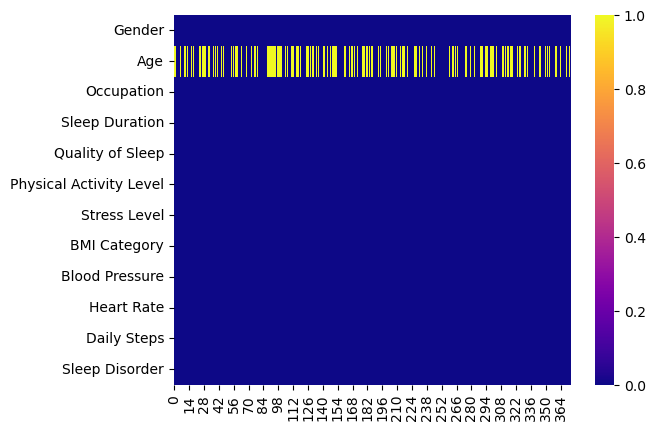

In [17]:
# Introducing missing values
shl_missing = shl.copy() #Making a copy of the dataframe to add missing values to
shl_mask = np.random.rand(shl_missing.shape[0]) < 0.4  #Making a mask to remove random values
shl_missing.loc[shl_mask, 'Age'] = np.nan #Removing the masked values

sns.heatmap(shl_missing.isna().transpose(), cmap="plasma") #Showing a heatmap of the now missing values

I had no missing numerical values to use for imputation, so i introduced my own with methods we  learned in class. I chose Age because it had a large range of possible values without too much skewedness in the original values. (And I thought it was a fun choice.)

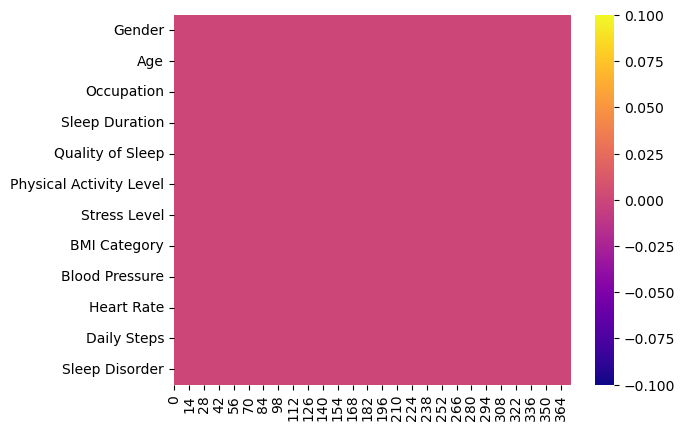

<Axes: xlabel='Age', ylabel='Count'>

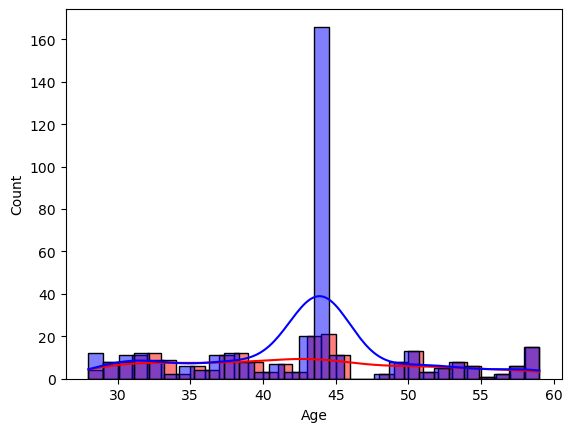

In [18]:
#Simple Imputer - mode
my_imp = SimpleImputer(missing_values=np.NaN, strategy = 'most_frequent')

# impute after temporarily removing the methods column
X = shl_missing.drop(columns=["Occupation", "Blood Pressure", "Sleep Disorder"])
imputed_X = my_imp.fit_transform(X)

# create DataFrame with correct column names and index
fixed_X = pd.DataFrame(imputed_X, columns=X.columns, index=X.index)

# add the 'method' column back
shl_imp = pd.concat([fixed_X, shl_missing[["Occupation", "Blood Pressure", "Sleep Disorder"]]], axis=1)

# ensure the columns are in the same order as the original DataFrame
shl_imp = shl_imp[shl_missing.columns]

sns.heatmap(shl_imp.isna().transpose(), cmap="plasma")
plt.show()

sns.histplot(shl_missing['Age'], bins = len(np.unique(shl_missing['Age'])), color='red', kde=True)
sns.histplot(shl_imp['Age'], bins = len(np.unique(shl_imp['Age'])), color='blue', kde=True)

The mode imputation method results in a massive increase of values with the same age, which will affect future analysis by weighting that age's importance, so it's not an ideal method.

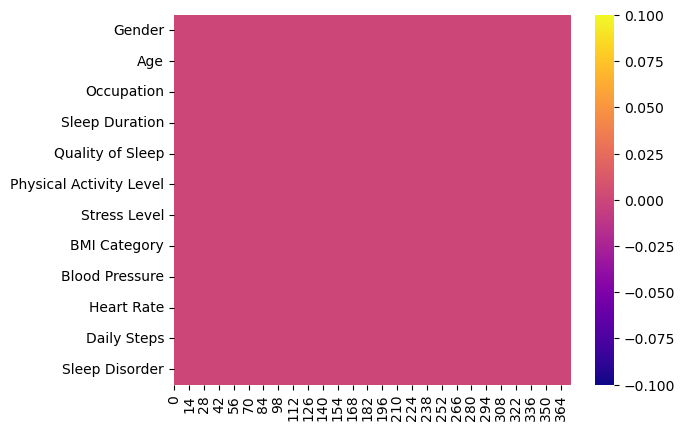

<Axes: xlabel='Age', ylabel='Count'>

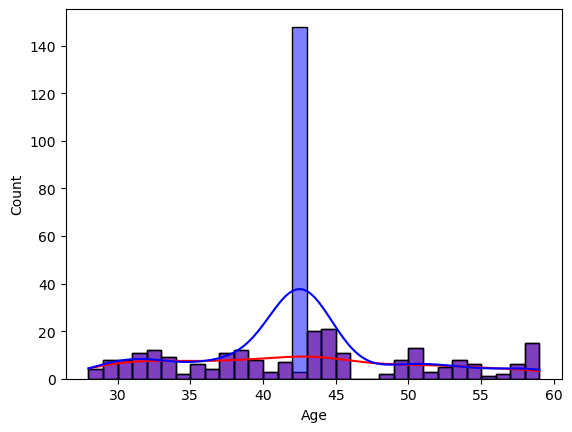

In [19]:
# SimpleImputer Imputation - mean

my_imp = SimpleImputer(missing_values=np.NaN)

# impute after temporarily removing the methods column
X = shl_missing.drop(columns=["Occupation", "Blood Pressure",  "Sleep Disorder"])
imputed_X = my_imp.fit_transform(X)

# create DataFrame with correct column names and index
fixed_X = pd.DataFrame(imputed_X, columns=X.columns, index=X.index)

# add the 'method' column back
shl_imp = pd.concat([fixed_X, shl_missing[["Occupation", "Blood Pressure",  "Sleep Disorder"]]], axis=1)

# ensure the columns are in the same order as the original DataFrame
shl_imp = shl_imp[shl_missing.columns]

sns.heatmap(shl_imp.isna().transpose(), cmap="plasma")
plt.show()

sns.histplot(shl_missing['Age'], bins = len(np.unique(shl_missing['Age'])), color='red', kde=True)
sns.histplot(shl_imp['Age'], bins = len(np.unique(shl_imp['Age'])), color='blue', kde=True)

The mean imputation method also results in a massive increase of values with the same age, which will affect future analysis by weighting that age's importance, but because the data is fairly evenly spread, the mean seems to be a slightly better value for the imputation.

MICE Imputation Results:
Mean Squared Error: 0.0924
R2 Score: 0.9387

Mean Imputation Results:
Mean Squared Error: 0.1010
R2 Score: 0.9331


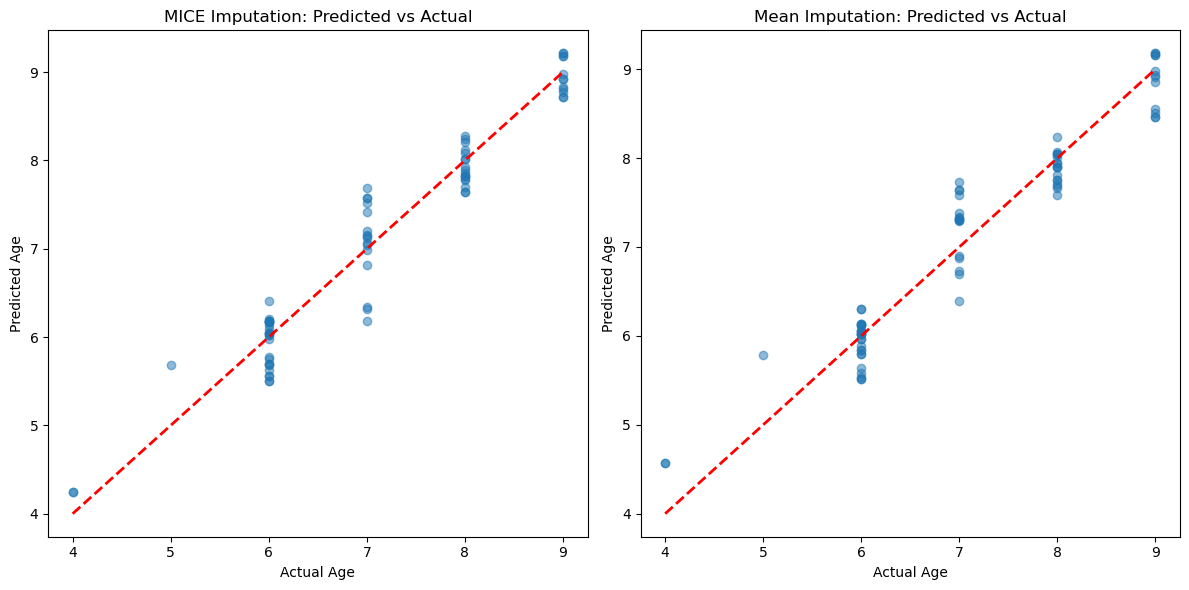


Feature Importances (MICE):
                   feature  importance
4             Stress Level    1.387151
1                      Age    0.800271
5             BMI Category    0.578975
0                   Gender    0.325066
2           Sleep Duration    0.263670
8           Sleep Disorder    0.181575
7              Daily Steps    0.126910
6               Heart Rate    0.075177
3  Physical Activity Level    0.038659

Feature Importances (Mean):
                   feature  importance
4             Stress Level    1.130330
2           Sleep Duration    0.636598
1                      Age    0.392654
5             BMI Category    0.230292
8           Sleep Disorder    0.147585
7              Daily Steps    0.126780
3  Physical Activity Level    0.040814
0                   Gender    0.024564
6               Heart Rate    0.017823

Exponentiated MSE (MICE): 1.0968
Exponentiated MSE (Mean): 1.1062


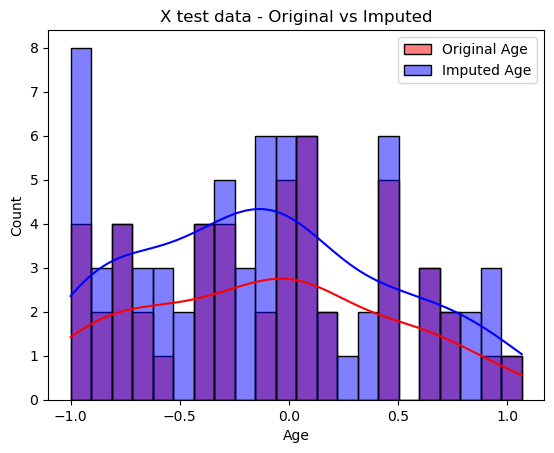

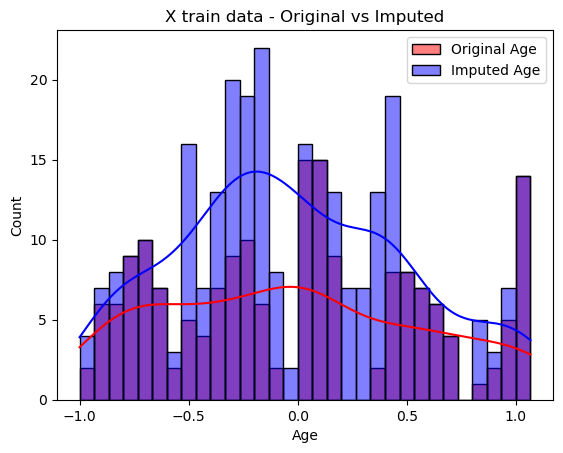

In [20]:
#MICE Imputation
X = shl_missing.drop(['Quality of Sleep', 'Occupation', 'Blood Pressure'], axis=1)
y = shl_missing['Quality of Sleep']#.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #Test set is 20%, train set is 80%

# Use RobustScaler instead of StandardScaler -> scales by the median instead of the mean
scaler = RobustScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)


# Perform MICE imputation
# Setting maximum number of iterations to perform when estimating the missing values to 50
mice_imputer = IterativeImputer(random_state=42, max_iter=10)
X_train_mice = pd.DataFrame(mice_imputer.fit_transform(X_train_scaled), 
                            columns=X_train.columns, index=X_train.index)
X_test_mice = pd.DataFrame(mice_imputer.transform(X_test_scaled), 
                           columns=X_test.columns, index=X_test.index)

# Train a linear regression model on the MICE imputed data
lr_mice = LinearRegression()
lr_mice.fit(X_train_mice, y_train)

# Make predictions and calculate MSE and R2
y_pred_mice = lr_mice.predict(X_test_mice)
mse_mice = mean_squared_error(y_test, y_pred_mice)
r2_mice = r2_score(y_test, y_pred_mice)

print(f"MICE Imputation Results:")
print(f"Mean Squared Error: {mse_mice:.4f}")
print(f"R2 Score: {r2_mice:.4f}")


# Compare with simple mean imputation
mean_imputer = SimpleImputer(strategy='mean')
X_train_mean = pd.DataFrame(mean_imputer.fit_transform(X_train_scaled), 
                            columns=X_train.columns, index=X_train.index)
X_test_mean = pd.DataFrame(mean_imputer.transform(X_test_scaled), 
                           columns=X_test.columns, index=X_test.index)

lr_mean = LinearRegression()
lr_mean.fit(X_train_mean, y_train)
y_pred_mean = lr_mean.predict(X_test_mean)
mse_mean = mean_squared_error(y_test, y_pred_mean)
r2_mean = r2_score(y_test, y_pred_mean)

print(f"\nMean Imputation Results:")
print(f"Mean Squared Error: {mse_mean:.4f}")
print(f"R2 Score: {r2_mean:.4f}")



# Visualize the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_mice, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('MICE Imputation: Predicted vs Actual')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_mean, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Mean Imputation: Predicted vs Actual')

plt.tight_layout()
plt.show()

# Print feature importances (coefficients for linear regression)
feature_importance_mice = pd.DataFrame({'feature': X_train.columns, 'importance': np.abs(lr_mice.coef_)})
feature_importance_mice = feature_importance_mice.sort_values('importance', ascending=False)
print("\nFeature Importances (MICE):")
print(feature_importance_mice)

feature_importance_mean = pd.DataFrame({'feature': X_train.columns, 'importance': np.abs(lr_mean.coef_)})
feature_importance_mean = feature_importance_mean.sort_values('importance', ascending=False)
print("\nFeature Importances (Mean):")
print(feature_importance_mean)

# Calculate and print exponentiated MSE for interpretability
print(f"\nExponentiated MSE (MICE): {np.exp(mse_mice):.4f}")
print(f"Exponentiated MSE (Mean): {np.exp(mse_mean):.4f}")

#Distributions of priginal vs imputed values
sns.histplot(X_test_scaled['Age'], bins = len(np.unique(X_test['Age'])), label = 'Original Age', color='red', kde=True)
sns.histplot(X_test_mice['Age'], bins = len(np.unique(X_test['Age'])), label = 'Imputed Age', color='blue', kde=True)
plt.title('X test data - Original vs Imputed')
plt.legend()
plt.show()

sns.histplot(X_train_scaled['Age'], bins = len(np.unique(X_train['Age'])), label = 'Original Age', color='red', kde=True)
sns.histplot(X_train_mice['Age'], bins = len(np.unique(X_train['Age'])), label = 'Imputed Age', color='blue', kde=True)
plt.title('X train data - Original vs Imputed')
plt.legend()
plt.show()

Unlike the mean and mode imputations, the MICE imputation did not lead to a spike in a single age value, instead it spread the imputed values across all of the ages. That means this is likely a better method to use for the purposes of imputing our missing values.

In [21]:
#SMOTE
X = shl_imp.drop(['Sleep Disorder', 'Occupation', 'Blood Pressure'], axis=1)
y = shl_imp['Sleep Disorder'].astype(int)

# display original class distribution
print("\nOriginal class distribution:")
print(y.value_counts())

# apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

resampled_shl = pd.DataFrame(X_resampled, columns=X.columns)
resampled_shl['Sleep Disorder'] = y_resampled


Original class distribution:
Sleep Disorder
0    219
1    155
Name: count, dtype: int64


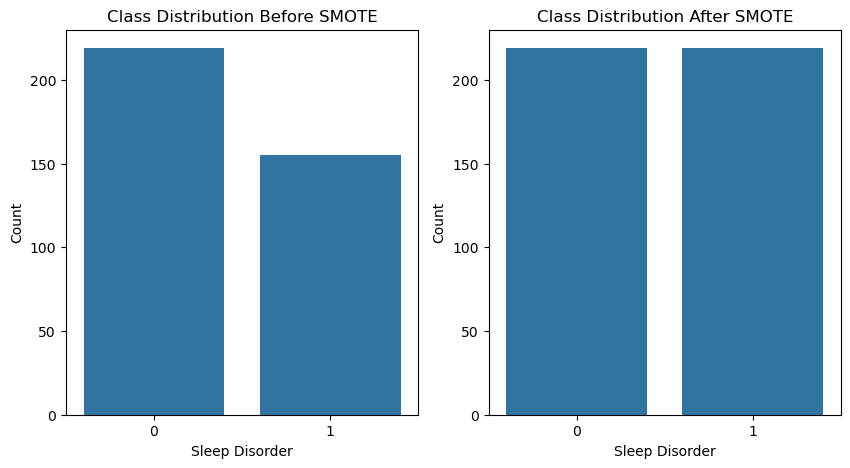

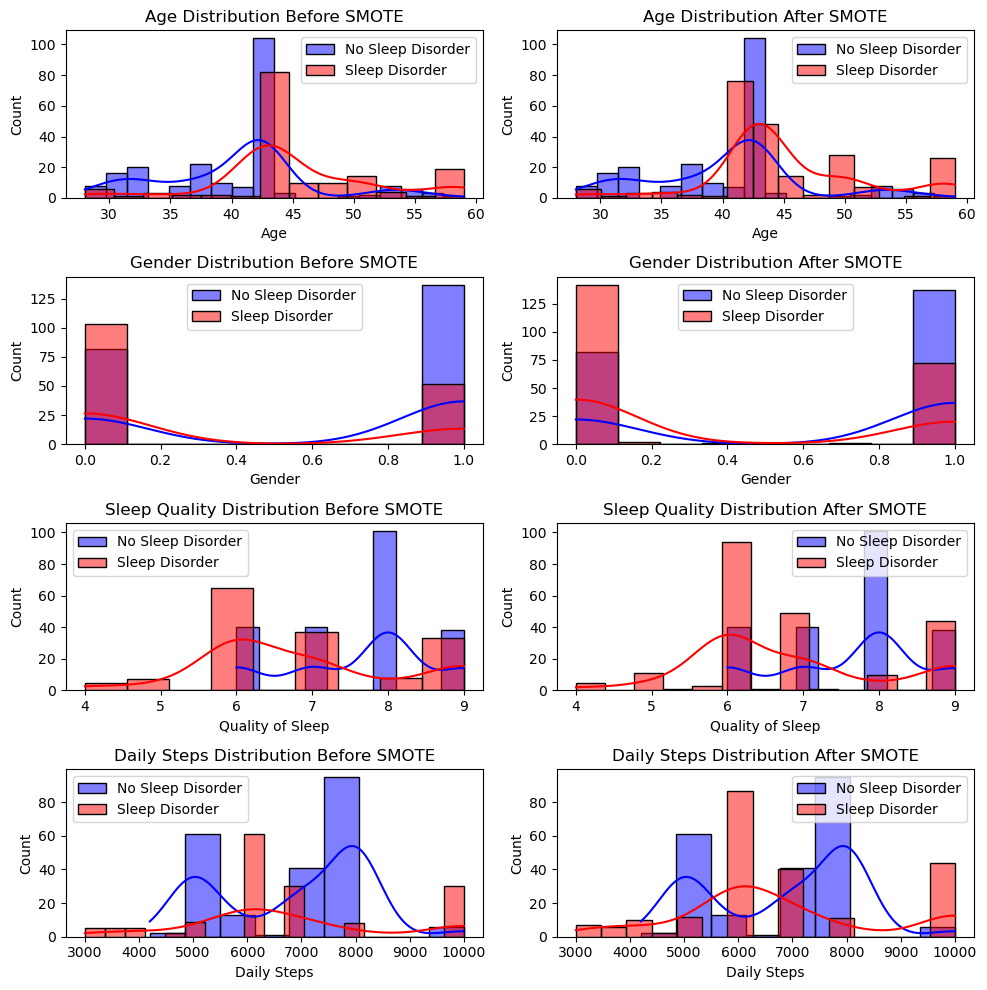

In [22]:
# Bar chart for class distribution after SMOTE
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x=y)
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Sleep Disorder')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.countplot(x=y_resampled)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Sleep Disorder')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10,10))

plt.subplot(4,2,1)
sns.histplot(shl_imp[shl_imp['Sleep Disorder']==0]['Age'], color='blue', label='No Sleep Disorder', kde=True)
sns.histplot(shl_imp[shl_imp['Sleep Disorder']==1]['Age'], color='red', label='Sleep Disorder', kde=True)
plt.title('Age Distribution Before SMOTE')
plt.legend()

plt.subplot(4,2,2)
sns.histplot(resampled_shl[resampled_shl['Sleep Disorder']==0]['Age'], color='blue', label='No Sleep Disorder', kde=True)
sns.histplot(resampled_shl[resampled_shl['Sleep Disorder']==1]['Age'], color='red', label='Sleep Disorder', kde=True)
plt.title('Age Distribution After SMOTE')
plt.legend()


plt.subplot(4,2,3)
sns.histplot(shl_imp[shl_imp['Sleep Disorder']==0]['Gender'], color='blue', label='No Sleep Disorder', kde=True)
sns.histplot(shl_imp[shl_imp['Sleep Disorder']==1]['Gender'], color='red', label='Sleep Disorder', kde=True)
plt.title('Gender Distribution Before SMOTE')
plt.legend()

plt.subplot(4,2,4)
sns.histplot(resampled_shl[resampled_shl['Sleep Disorder']==0]['Gender'], color='blue', label='No Sleep Disorder', kde=True)
sns.histplot(resampled_shl[resampled_shl['Sleep Disorder']==1]['Gender'], color='red', label='Sleep Disorder', kde=True)
plt.title('Gender Distribution After SMOTE')
plt.legend()


plt.subplot(4,2,5)
sns.histplot(shl_imp[shl_imp['Sleep Disorder']==0]['Quality of Sleep'], color='blue', label='No Sleep Disorder', kde=True)
sns.histplot(shl_imp[shl_imp['Sleep Disorder']==1]['Quality of Sleep'], color='red', label='Sleep Disorder', kde=True)
plt.title('Sleep Quality Distribution Before SMOTE')
plt.legend()

plt.subplot(4,2,6)
sns.histplot(resampled_shl[resampled_shl['Sleep Disorder']==0]['Quality of Sleep'], color='blue', label='No Sleep Disorder', kde=True)
sns.histplot(resampled_shl[resampled_shl['Sleep Disorder']==1]['Quality of Sleep'], color='red', label='Sleep Disorder', kde=True)
plt.title('Sleep Quality Distribution After SMOTE')
plt.legend()


plt.subplot(4,2,7)
sns.histplot(shl_imp[shl_imp['Sleep Disorder']==0]['Daily Steps'], color='blue', label='No Sleep Disorder', kde=True)
sns.histplot(shl_imp[shl_imp['Sleep Disorder']==1]['Daily Steps'], color='red', label='Sleep Disorder', kde=True)
plt.title('Daily Steps Distribution Before SMOTE')
plt.legend()

plt.subplot(4,2,8)
sns.histplot(resampled_shl[resampled_shl['Sleep Disorder']==0]['Daily Steps'], color='blue', label='No Sleep Disorder', kde=True)
sns.histplot(resampled_shl[resampled_shl['Sleep Disorder']==1]['Daily Steps'], color='red', label='Sleep Disorder', kde=True)
plt.title('Daily Steps Distribution After SMOTE')
plt.legend()


plt.tight_layout()
plt.show()

The above plots show distributions of key variables before and after SMOTE to show what effect it might have on the data for analysis. The resampling seems to have removed some ages in the sleep disorder category. Otherwise there seem to only be slight increase/decreases in frequency of other variables.

# 4. Streamlit App Development & 9. Enhanced App Features

Can be found here: https://cmse830sleepandhealth.streamlit.app

# 5. GitHub Repository
Can be found here: https://github.com/jansena4/CMSE830